# Heart Failure Classification

## Problem Statement
Heart failure is a critical condition often caused by cardiovascular diseases (CVDs). Early prediction of heart failure can aid in timely medical intervention and improve patient outcomes. This project involves implementing classification models to predict heart failure based on clinical features.

In [ ]:
print('Welcome to This notebook!')

Welcome to This notebook!


## Dataset and Preparation

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
import pandas as pd
url = "https://drive.google.com/uc?export=download&id=1OvNEaSL4IitCzJqYtMNNUoF18kK7R_fn"
df = pd.read_csv(url)
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


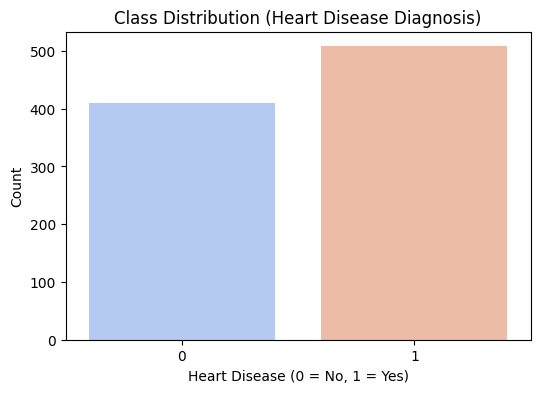

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="HeartDisease", data=df, hue="HeartDisease", palette="coolwarm", legend=False)
plt.title("Class Distribution (Heart Disease Diagnosis)")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

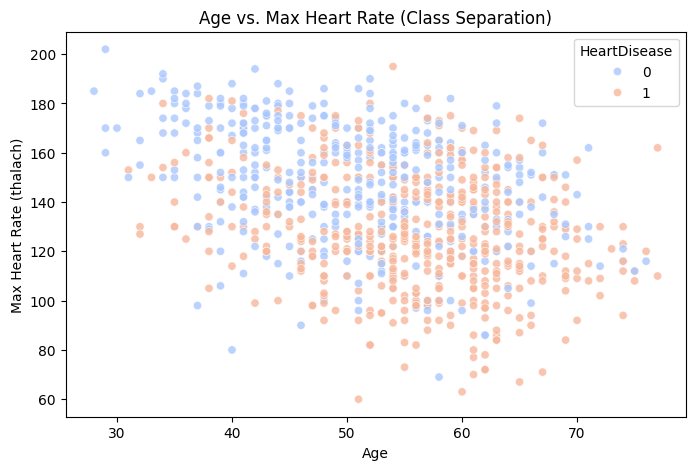

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Age"], y=df["MaxHR"], hue=df["HeartDisease"], palette="coolwarm", alpha=0.8)
plt.title("Age vs. Max Heart Rate (Class Separation)")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.show()

In [ ]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [ ]:
label = 'HeartDisease'
X = df.drop(columns=[label])
y = df[label]

In [ ]:
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=RANDOM_SEED)
for train_val_index, test_index in sss1.split(X, y):
    X_train_val = X.iloc[train_val_index]
    y_train_val = y.iloc[train_val_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

In [ ]:
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.125, random_state=RANDOM_SEED)
for train_index, val_index in sss2.split(X_train_val, y_train_val):
    X_train = X_train_val.iloc[train_index]
    y_train = y_train_val.iloc[train_index]
    X_val = X_train_val.iloc[val_index]
    y_val = y_train_val.iloc[val_index]

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (642, 11)
X_val shape: (92, 11)
X_test shape: (184, 11)
y_train shape: (642,)
y_val shape: (92,)
y_test shape: (184,)


In [ ]:
def print_class_ratios(y, label):
    class_counts = y.value_counts(normalize=True)
    print(f"\nClass distribution in {label}:")
    print(class_counts)

print_class_ratios(y_train, "y_train")
print_class_ratios(y_val, "y_val")
print_class_ratios(y_test, "y_test")


Class distribution in y_train:
HeartDisease
1    0.55296
0    0.44704
Name: proportion, dtype: float64

Class distribution in y_val:
HeartDisease
1    0.554348
0    0.445652
Name: proportion, dtype: float64

Class distribution in y_test:
HeartDisease
1    0.554348
0    0.445652
Name: proportion, dtype: float64


In [ ]:
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

In [ ]:
print(f"numerical features: {numerical_features}")
print(f"categorical features features: {categorical_features}")

numerical features: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
categorical features features: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [ ]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [ ]:
preprocessor = ColumnTransformer([
    ('numerical transformation phase', numerical_transformer, numerical_features),
    ('categorical transformation phase', categorical_transformer, categorical_features)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [ ]:

X_train_transformed = pipeline.fit_transform(X_train)
X_val_transformed = pipeline.transform(X_val)
X_test_transformed = pipeline.transform(X_test)

print(f"X_train_transformed shape: {X_train_transformed.shape}")
print(f"X_val_transformed shape: {X_val_transformed.shape}")
print(f"X_test_transformed shape: {X_test_transformed.shape}")
print("Data splitting and preprocessing complete!")

X_train_transformed shape: (642, 20)
X_val_transformed shape: (92, 20)
X_test_transformed shape: (184, 20)
Data splitting and preprocessing complete!


## Implementation Details

### Decision Tree Algorithm

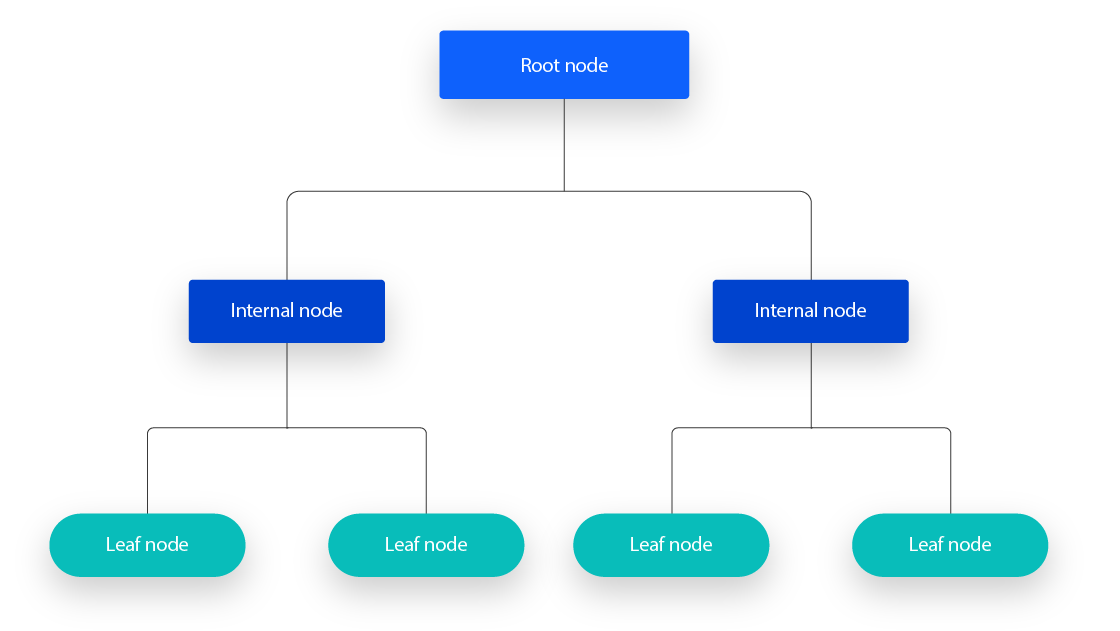

In [ ]:
def entropy(y):
    m = len(y)
    if m == 0:
        return 0
    counts = np.bincount(y)
    probabilities = counts / m
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

In [ ]:
def information_gain(y, y_left, y_right):
    m = len(y)
    gain = entropy(y)
    gain -= (len(y_left) / m) * entropy(y_left)
    gain -= (len(y_right) / m) * entropy(y_right)
    return gain

In [ ]:
def get_mid_points(x):
  mid_points = []
  for i in range(len(x) - 1):
    mid_points.append((x[i] + x[i + 1]) / 2)
  return mid_points

In [ ]:
class Node:
  def __init__(self, feature=None, threshold=None, left=None, right=None, prediction=None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.prediction = prediction

  def predict(self, x):
    if self.prediction is not None:
      return self.prediction

    if self.left is not None and x[self.feature] <= self.threshold:
      return self.left.predict(x)

    if self.right is not None:
      return self.right.predict(x)

In [ ]:
class DecisionTree:
  def __init__(self, samples, labels, max_depth=5, minimum_sample_splits= 0):
    self.samples = samples
    self.labels = labels
    self.max_depth = max_depth
    self.minimum_sample_splits = minimum_sample_splits
    self.root = self.__build_tree(0, samples, labels)

  def predict(self, features):
    return np.array([self.root.predict(feature) for feature in features])

  def __find_best_split(self, samples, labels):
    m, n = samples.shape
    if m <= 1:
      return None, None

    best_gain = 0
    best_feature = None
    best_threshold = None

    for feature in range(n):
      thresholds = np.unique(samples[:, feature])

      if not self.__is_categorical(thresholds):
        thresholds = get_mid_points(thresholds)

      for threshold in thresholds:
        left_indices = samples[:, feature] <= threshold
        right_indices = samples[:, feature] > threshold

        if len(labels[left_indices]) < self.minimum_sample_splits or len(labels[right_indices]) < self.minimum_sample_splits:
          continue

        gain = information_gain(labels, labels[left_indices], labels[right_indices])
        if gain > best_gain:
          best_gain = gain
          best_feature = feature
          best_threshold = threshold

    return best_feature, best_threshold

  def __build_tree(self, depth, samples, labels):
    feature, threshold = self.__find_best_split(samples, labels)

    if depth == self.max_depth or feature is None:
      return Node(prediction=np.bincount(labels).argmax())

    left_indices = samples[:, feature] <= threshold
    right_indices = samples[:, feature] > threshold

    left = self.__build_tree(depth + 1, samples[left_indices], labels[left_indices])
    right = self.__build_tree(depth + 1, samples[right_indices], labels[right_indices])

    return Node(feature=feature, threshold=threshold, left=left, right=right)

  def __is_categorical(self, x):
    return len(x) == 2 and 0 in x and 1 in x

In [ ]:
depth_ranges = list(range(1, 21))
minimum_sample_splits_ranges = list(range(0, 31))
max_score = -1
best_depth = -1
best_split = -1

for depth in depth_ranges:
  for split in minimum_sample_splits_ranges:
    decision_tree = DecisionTree(samples= X_train_transformed,
                                 labels= y_train.values,
                                 max_depth= depth,
                                 minimum_sample_splits= split)

    y_prediction = decision_tree.predict(X_val_transformed)
    score = accuracy_score(y_pred= y_prediction, y_true= y_val.values)

    if score > max_score:
      max_score = score
      best_depth = depth
      best_split = split

print(f"Best hyper-parameters combinations are depth= {best_depth} minimum sample splits= {best_split} with validation accuracy= {max_score}")

Best hyper-parameters combinations are depth= 5 minimum sample splits= 7 with validation accuracy= 0.8586956521739131


In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train_transformed, y_train.values)

# Predict on test data
y_pred = clf.predict(X_val_transformed)

# Print accuracy
print(f"Accuracy: {accuracy_score(y_pred= y_pred, y_true= y_val.values):.6f}")

Test Accuracy: 0.8097826086956522
Test Precision: 0.8526315789473684
Test Recall: 0.7941176470588235
Test F1-score: 0.8223350253807107



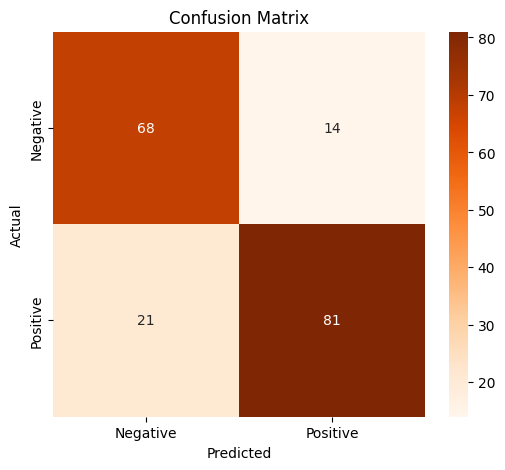

In [ ]:
decision_tree = DecisionTree(samples= X_train_transformed,
                                 labels= y_train.values,
                                 max_depth= 5,
                                 minimum_sample_splits= 7)

decision_tree_test_prediction= decision_tree.predict(X_test_transformed)

test_accuracy= accuracy_score(y_test.values, decision_tree_test_prediction)
precision= precision_score(y_test.values, decision_tree_test_prediction)
recall= recall_score(y_test.values, decision_tree_test_prediction)
f1= f1_score(y_test.values, decision_tree_test_prediction)
conf_matrix= confusion_matrix(y_test.values, decision_tree_test_prediction)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1-score: {f1}")
print()

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Bagging Ensemble Algorithm
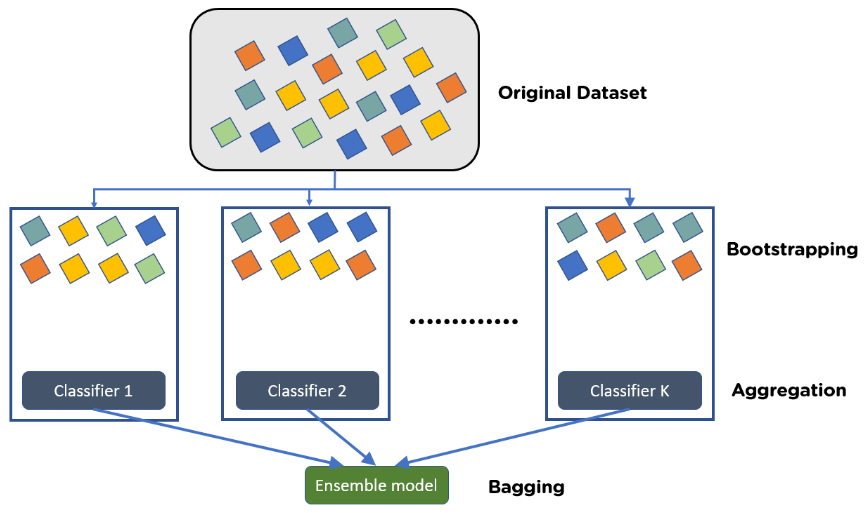

In [ ]:
import numpy as np

class BaggingClassifier:
  def __init__(self, n_estimators=20):
      self.n_estimators = n_estimators
      self.models = []

  def fit(self, x, y) :
    n_samples_bagging , n_features_bagging = x.shape
    for _ in range (self.n_estimators) :
      index = np.random.choice(n_samples_bagging , size = n_samples_bagging , replace = True)
      x_bagging = x[index]
      y_bagging = y[index]

      random_depth = np.random.randint(2,10)
      model = DecisionTree(samples = x_bagging , labels = y_bagging , max_depth = random_depth)
      self.models.append(model)

  def predict(self, x) :
    n_samples , n_features = x.shape
    y_expected = np.zeros(n_samples)

    for model in self.models :
        model_prediction = model.predict(x)
        y_expected = y_expected + model_prediction
    y_expected = y_expected / self.n_estimators

    return np.round(y_expected)


In [ ]:
best_accuracy = 0.0
best_bagging_model = None
best_n_bagging_estimators = None

for n_estimators_ in [10 , 20 , 50 , 100 ] :
  bagging_model = BaggingClassifier(n_estimators = n_estimators_)
  bagging_model.fit(X_train_transformed, y_train.values)
  y_predicted_bagging = bagging_model.predict(X_val_transformed)
  accuracy_bagging = accuracy_score(y_val.values , y_predicted_bagging)
  print(f'accuracy = {accuracy_bagging} for number of estimator = {n_estimators_}')
  if accuracy_bagging > best_accuracy :
    best_accuracy = accuracy_bagging
    best_bagging_model = bagging_model
    best_n_bagging_estimators = n_estimators_

Bagging_model = best_bagging_model
print(f'accuracy of the best model is {best_accuracy}')
print(f'number of estimators of the best model is {best_n_bagging_estimators}')


accuracy = 0.8369565217391305 for number of estimator = 10
accuracy = 0.8586956521739131 for number of estimator = 20
accuracy = 0.8586956521739131 for number of estimator = 50
accuracy = 0.8586956521739131 for number of estimator = 100
accuracy of the best model is 0.8586956521739131
number of estimators of the best model is 20



Test Accuracy: 0.8424
Test Precision: 0.8411
Test Recall: 0.8824
Test F1-score: 0.8612


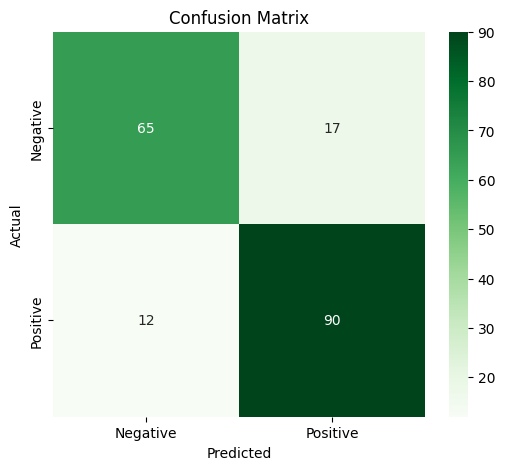

In [ ]:
y_test_pred = Bagging_model.predict(X_test_transformed)

accuracy = accuracy_score(y_test.values, y_test_pred)
precision = precision_score(y_test.values, y_test_pred)
recall = recall_score(y_test.values, y_test_pred)
f1 = f1_score(y_test.values, y_test_pred)
conf_matrix = confusion_matrix(y_test.values, y_test_pred)

print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### AdaBoost Ensemble Algorithm
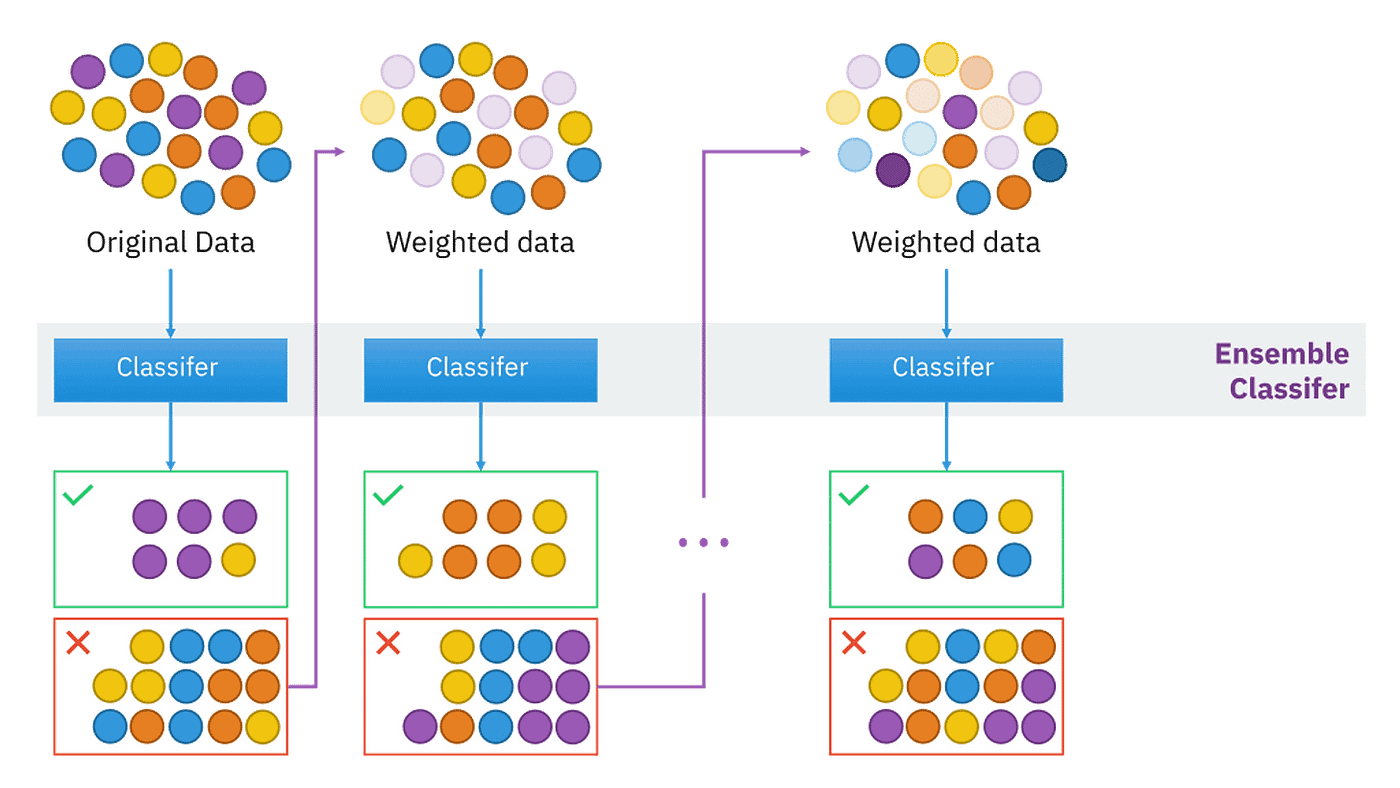

In [ ]:
class DecisionStump:
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.left_class = None # class label (-1 / 1)
        self.right_class = None # class label (-1 / 1)

    def fit(self, X, y, sample_weight):
        n_samples, n_features = X.shape
        best_info_gain = -1

        for feature_idx in range(n_features):
            feature_values = np.sort(np.unique(X[:, feature_idx]))

            for i in range(len(feature_values) - 1):
                threshold = (feature_values[i] + feature_values[i + 1]) / 2

                info_gain, left_class, right_class = self._calculate_info_gain(X, y, sample_weight, feature_idx, threshold)

                if info_gain > best_info_gain:
                    best_info_gain = info_gain
                    self.feature_index = feature_idx
                    self.threshold = threshold
                    self.left_class = left_class
                    self.right_class = right_class

    def _calculate_info_gain(self, X, y, sample_weight, feature_idx, threshold):
        left_indices = X[:, feature_idx] <= threshold
        right_indices = X[:, feature_idx] > threshold

        if sum(left_indices) == 0 or sum(right_indices) == 0:
            return 0, None, None

        left_weighted = sample_weight[left_indices]
        right_weighted = sample_weight[right_indices]

        left_class = np.sign(np.sum(y[left_indices] * left_weighted))
        right_class = np.sign(np.sum(y[right_indices] * right_weighted))

        entropy_before = self._entropy(y, sample_weight)
        entropy_after = ((np.sum(left_weighted) / np.sum(sample_weight)) * self._entropy(y[left_indices], left_weighted) +
                         (np.sum(right_weighted) / np.sum(sample_weight)) * self._entropy(y[right_indices], right_weighted))

        info_gain = entropy_before - entropy_after
        return info_gain, left_class, right_class

    def _entropy(self, y, weights):
        probs = [np.sum(weights[y == c]) / np.sum(weights) for c in [-1, 1]]
        return -sum(p * np.log2(p) for p in probs if p > 0)

    def predict(self, X):
        return np.where(X[:, self.feature_index] <= self.threshold, self.left_class, self.right_class)

In [ ]:
y_train_copy = np.where(y_train == 0, -1, 1)
y_val_copy = np.where(y_val == 0, -1, 1)
y_test_copy = np.where(y_test == 0, -1, 1)

class AdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.alphas = []
        self.models = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        w = np.ones(n_samples) / n_samples

        for _ in range(self.n_estimators):
            # model = DecisionTreeClassifier(max_depth=1)
            model = DecisionStump()
            model.fit(X, y, sample_weight=w)
            predictions = model.predict(X)

            err = np.sum(w * (predictions != y)) / np.sum(w)
            alpha = 0.5 * np.log((1 - err) / (err + 1e-10))

            self.alphas.append(alpha)
            self.models.append(model)
            w = w * np.exp(-alpha * y * predictions)
            w = w / np.sum(w)

    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for model, alpha in zip(self.models, self.alphas):
            predictions += alpha * model.predict(X)
        return np.sign(predictions).astype(int)

In [ ]:
best_accuracy = 0
best_n_estimators = None
best_model = None

for n in [10, 50, 100, 150, 200]:
    adaboost = AdaBoost(n_estimators=n)
    adaboost.fit(X_train_transformed, y_train_copy)
    y_pred = adaboost.predict(X_val_transformed)
    accuracy = np.mean(y_pred == y_val_copy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n
        best_model = adaboost

print(f"Best number of estimators: {best_n_estimators}")
print(f"Best accuracy: {best_accuracy:.4f}")

Best number of estimators: 200
Best accuracy: 0.8478



Test Accuracy: 0.8804
Test Precision: 0.9000
Test Recall: 0.8824
Test F1-score: 0.8911


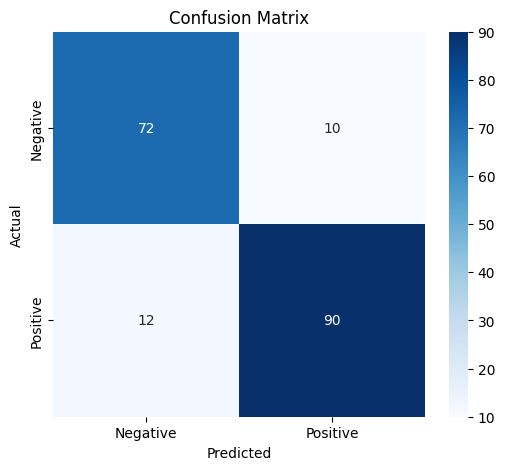

In [ ]:
y_test_pred = adaboost.predict(X_test_transformed)
y_test_pred_binary = np.where(y_test_pred == -1, 0, 1)
y_test_copy_binary = np.where(y_test_copy == -1, 0, 1)

accuracy = accuracy_score(y_test_copy_binary, y_test_pred_binary)
precision = precision_score(y_test_copy_binary, y_test_pred_binary)
recall = recall_score(y_test_copy_binary, y_test_pred_binary)
f1 = f1_score(y_test_copy_binary, y_test_pred_binary)
conf_matrix = confusion_matrix(y_test_copy_binary, y_test_pred_binary)

print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### KNN Algorithm

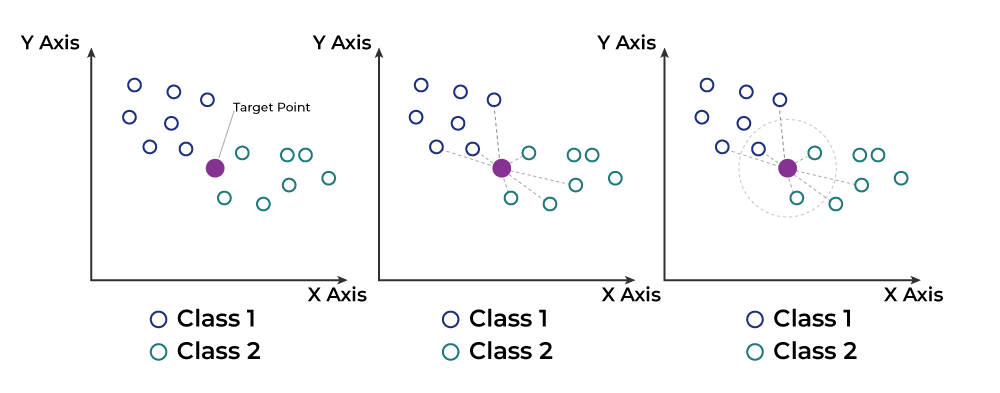

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
class K_Nearest_Neighbors:
    def __init__(self, k=3, metric="minkowski", p=2):
        self.k = k
        self.metric = metric
        self.model = KNeighborsClassifier(n_neighbors=k, metric=metric, p=p)

    def fit(self, x, y):
        self.model.fit(x, y)

    def predict(self, x):
        return self.model.predict(x)


In [ ]:
best_k = None
best_model = None
best_accuracy_knn = 0.0
best_p = None
metrics = 'minkowski'
p_value_minkowski = [1, 2, 3]
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 51, 101]

for p in p_value_minkowski :
  print(f'With  minkowski and p ={p}')
  for k in k_values :
    knn = K_Nearest_Neighbors(k=k, metric=metrics, p=p)
    knn.fit(X_train_transformed, y_train.values)
    y_pred = knn.predict(X_val_transformed)
    accuracy = accuracy_score(y_val.values, y_pred)
    print(f'Best k = {k} , with accuracy = {accuracy} ')
    if accuracy - best_accuracy_knn > 0.0001  :
      best_accuracy_knn = accuracy
      best_k = k
      best_model = knn
      best_p = p
  print("\n")

if best_p == 1:
    metric = "manhattan"
elif best_p == 2:
    metric = "euclidean"
else:
    metric = "minkowski"
knn_model = best_model
print(f'Best k = {best_k} , with accuracy = {best_accuracy_knn} and metric = {metric}')



With  minkowski and p =1
Best k = 1 , with accuracy = 0.8152173913043478 
Best k = 3 , with accuracy = 0.8804347826086957 
Best k = 5 , with accuracy = 0.8369565217391305 
Best k = 7 , with accuracy = 0.8369565217391305 
Best k = 9 , with accuracy = 0.8369565217391305 
Best k = 11 , with accuracy = 0.8478260869565217 
Best k = 13 , with accuracy = 0.8586956521739131 
Best k = 15 , with accuracy = 0.8586956521739131 
Best k = 51 , with accuracy = 0.8152173913043478 
Best k = 101 , with accuracy = 0.782608695652174 


With  minkowski and p =2
Best k = 1 , with accuracy = 0.8043478260869565 
Best k = 3 , with accuracy = 0.8478260869565217 
Best k = 5 , with accuracy = 0.8152173913043478 
Best k = 7 , with accuracy = 0.8478260869565217 
Best k = 9 , with accuracy = 0.8260869565217391 
Best k = 11 , with accuracy = 0.8260869565217391 
Best k = 13 , with accuracy = 0.8369565217391305 
Best k = 15 , with accuracy = 0.8369565217391305 
Best k = 51 , with accuracy = 0.7934782608695652 
Best k =


Test Accuracy: 0.8967
Test Precision: 0.8952
Test Recall: 0.9216
Test F1-score: 0.9082


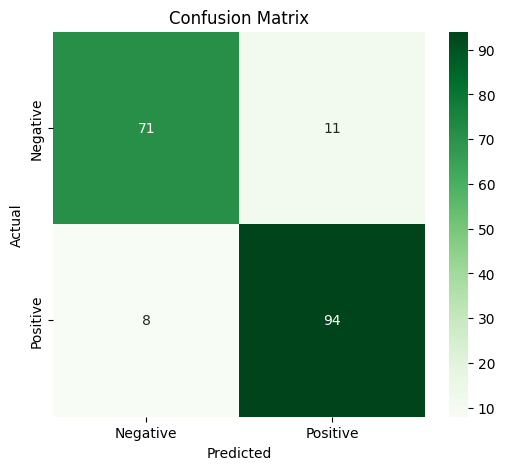

In [ ]:
y_test_pred = knn_model.predict(X_test_transformed)

accuracy = accuracy_score(y_test.values, y_test_pred)
precision = precision_score(y_test.values, y_test_pred)
recall = recall_score(y_test.values, y_test_pred)
f1 = f1_score(y_test.values, y_test_pred)
conf_matrix = confusion_matrix(y_test.values, y_test_pred)

print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Logistic Regression Algorithm

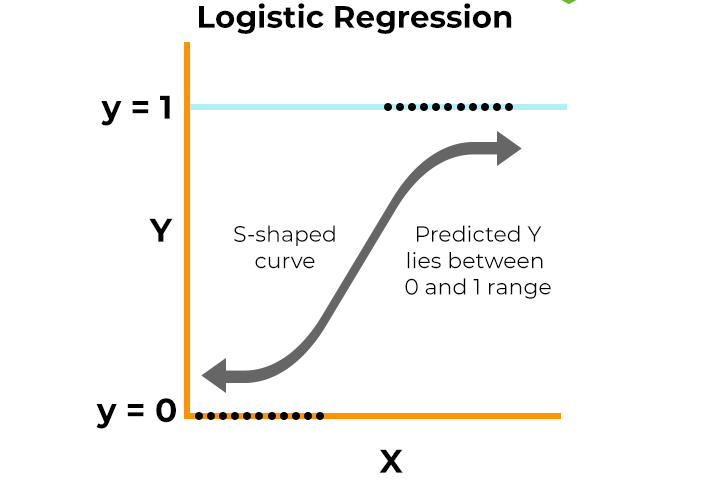

In [ ]:
regulaizers= ['l1', 'l2']
solvers= ['liblinear', 'saga', 'newton-cg', 'sag', 'lbfgs']
max_iterations= list(range(100, 1201, 200))

best_reg = None
best_solver = None
best_iterations = -1
max_score = -1

for reg in regulaizers:
  for solver in solvers:
    if reg == 'l1' and solver not in ['liblinear', 'saga']:
            continue  # Skip incompatible combinations

    for i in max_iterations:
      model = LogisticRegression(penalty= reg, solver= solver, max_iter= i, n_jobs= -1)
      model.fit(X_train_transformed, y_train.values)

      pred = model.predict(X_val_transformed)
      score = accuracy_score(y_val.values, pred)

      if score > max_score:
        best_reg = reg
        best_solver = solver
        best_iterations = i
        max_score = score

print()
print(f"Best combinations are:")
print(f"  Regulaizer: {best_reg}")
print(f"  Solver: {best_solver}")
print(f"  Iterations: {best_iterations}")
print(f"  Score: {max_score}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  


Best combinations are:
  Regulaizer: l1
  Solver: liblinear
  Iterations: 100
  Score: 0.8152173913043478


Test Accuracy: 0.8967391304347826
Test Precision: 0.8878504672897196
Test Recall: 0.9313725490196079
Test F1-score: 0.9090909090909091



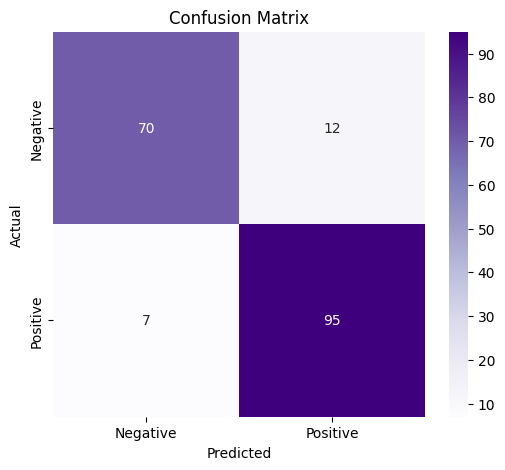

In [ ]:
logistic_reg = LogisticRegression(penalty="l1", solver="liblinear", max_iter= 100)
logistic_reg.fit(X_train_transformed, y_train.values)

prediction= logistic_reg.predict(X_test_transformed)

test_accuracy= accuracy_score(y_test.values, prediction)
precision= precision_score(y_test.values, prediction)
recall= recall_score(y_test.values, prediction)
f1= f1_score(y_test.values, prediction)
conf_matrix= confusion_matrix(y_test.values, prediction)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1-score: {f1}")
print()

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Feed Forward Neural Network Algorithm
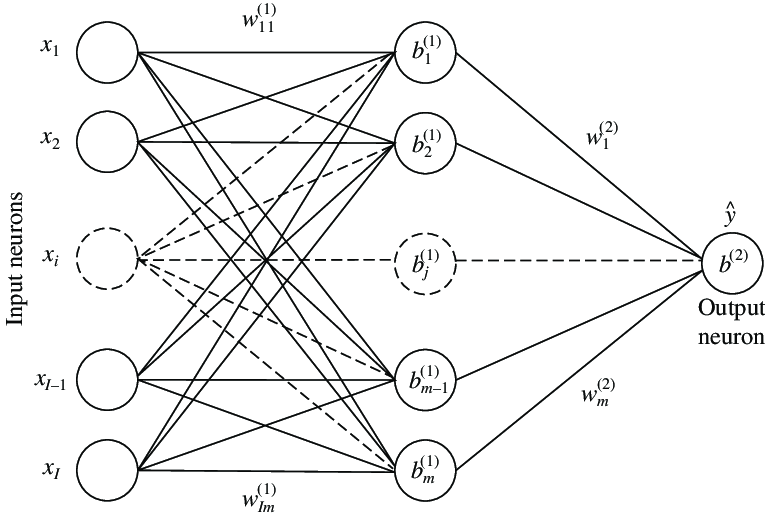


In [ ]:
X_train_tensor = torch.tensor(X_train_transformed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_val_tensor = torch.tensor(X_val_transformed, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_transformed, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [ ]:
print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"X_val_tensor shape: {X_val_tensor.shape}")
print(f"X_test_tensor shape: {X_test_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"y_val_tensor shape: {y_val_tensor.shape}")
print(f"y_test_tensor shape: {y_test_tensor.shape}")

X_train_tensor shape: torch.Size([642, 20])
X_val_tensor shape: torch.Size([92, 20])
X_test_tensor shape: torch.Size([184, 20])
y_train_tensor shape: torch.Size([642, 1])
y_val_tensor shape: torch.Size([92, 1])
y_test_tensor shape: torch.Size([184, 1])


In [ ]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_neurons1, hidden_neurons2, hidden_neurons3):
        super(FeedForwardNN, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_neurons1)
        self.hidden2 = nn.Linear(hidden_neurons1, hidden_neurons2)
        self.hidden3 = nn.Linear(hidden_neurons2, hidden_neurons3)
        self.output = nn.Linear(hidden_neurons3, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.relu(self.hidden3(x))
        x = self.sigmoid(self.output(x))
        return x

In [ ]:
hidden_neurons_list = [8, 16, 32]
learning_rates = [0.01, 0.001, 0.0001]
epochs_list = [100, 300, 500]

best_model = None
best_val_loss = float('inf')
best_hyperparams = {}

In [ ]:
for hidden_neurons1 in hidden_neurons_list:
    for hidden_neurons2 in hidden_neurons_list:
        for hidden_neurons3 in hidden_neurons_list:
          for lr in learning_rates:
              for num_epochs in epochs_list:
                  print(f"\nTraining with {hidden_neurons1}-{hidden_neurons2}-{hidden_neurons3} neurons, lr={lr}, epochs={num_epochs}")

                  model = FeedForwardNN(X_train_tensor.shape[1], hidden_neurons1, hidden_neurons2, hidden_neurons3)
                  criterion = nn.BCELoss()
                  optimizer = optim.Adam(model.parameters(), lr=lr)

                  for epoch in range(1, num_epochs + 1):
                      model.train()
                      epoch_loss = 0

                      for X_batch, y_batch in train_loader:
                          optimizer.zero_grad()
                          y_pred = model(X_batch)
                          loss = criterion(y_pred, y_batch)
                          loss.backward()
                          optimizer.step()
                          epoch_loss += loss.item()

                      epoch_loss /= len(train_loader)

                      if epoch % 10 == 0 or epoch == 1 or epoch == num_epochs:
                          print(f"Epoch {epoch}/{num_epochs} - Training Loss: {epoch_loss:.4f}")

                      model.eval()
                      val_loss = 0
                      with torch.no_grad():
                          for X_batch, y_batch in val_loader:
                              y_pred = model(X_batch)
                              val_loss += criterion(y_pred, y_batch).item()
                      val_loss /= len(val_loader)

                      print(f"Validation Loss: {val_loss:.4f}")

                      if val_loss < best_val_loss:
                          best_val_loss = val_loss
                          best_model = model
                          best_hyperparams = {
                              "hidden_neurons1": hidden_neurons1,
                              "hidden_neurons2": hidden_neurons2,
                              "learning_rate": lr,
                              "epochs": num_epochs
                          }

print(f"\nBest Hyperparameters: {best_hyperparams}")

Streaming output truncated to the last 5000 lines.

Training with 16-8-16 neurons, lr=0.0001, epochs=100
Epoch 1/100 - Training Loss: 0.6976
Epoch 10/100 - Training Loss: 0.6900
Epoch 20/100 - Training Loss: 0.6745
Epoch 30/100 - Training Loss: 0.6256
Epoch 40/100 - Training Loss: 0.5591
Epoch 50/100 - Training Loss: 0.4671
Epoch 60/100 - Training Loss: 0.4236
Epoch 70/100 - Training Loss: 0.3797
Epoch 80/100 - Training Loss: 0.3658
Epoch 90/100 - Training Loss: 0.3388
Epoch 100/100 - Training Loss: 0.3235
Validation Loss: 0.4071

Training with 16-8-16 neurons, lr=0.0001, epochs=300
Epoch 1/300 - Training Loss: 0.6926
Epoch 10/300 - Training Loss: 0.6875
Epoch 20/300 - Training Loss: 0.6764
Epoch 30/300 - Training Loss: 0.6468
Epoch 40/300 - Training Loss: 0.5845
Epoch 50/300 - Training Loss: 0.5032
Epoch 60/300 - Training Loss: 0.4250
Epoch 70/300 - Training Loss: 0.4015
Epoch 80/300 - Training Loss: 0.3534
Epoch 90/300 - Training Loss: 0.3772
Epoch 100/300 - Training Loss: 0.3307
Epo

In [ ]:
best_model.eval()
with torch.no_grad():
    y_test_pred = best_model(X_test_tensor)
    y_test_pred_labels = (y_test_pred > 0.5).float()


Test Accuracy: 0.9130
Test Precision: 0.9135
Test Recall: 0.9314
Test F1-score: 0.9223


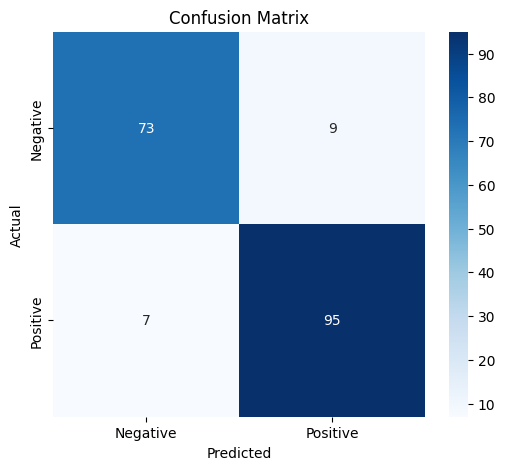

In [ ]:
y_test_np = y_test_tensor.numpy().flatten()
y_pred_np = y_test_pred_labels.numpy().flatten()

accuracy = accuracy_score(y_test_np, y_pred_np)
precision = precision_score(y_test_np, y_pred_np)
recall = recall_score(y_test_np, y_pred_np)
f1 = f1_score(y_test_np, y_pred_np)
conf_matrix = confusion_matrix(y_test_np, y_pred_np)

print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()